This notebook explores Gröbner bases of knapsack problems with
binary and with integer variables. The idea is to find the points
at which the two differ (Markov basis construction, truncation, etc).

With a good enough description of these differences, it will hopefully
be possible to propose relevant optimizations for the binary case.

In [3]:
using MIPMatrixTools.IPInstances

A = [15 18 19 17 20]
b = [45]
C = [1 1 1 1 1]
u = [nothing for i in 1:5]

integer_instance = IPInstance(A, b, C, u)
println("Integer instance:")
println(integer_instance.model)

u_binary = [1 for i in 1:5]
binary_instance = IPInstance(A, b, C, u_binary)
println("Binary instance:")
println(binary_instance.model)

Integer instance:


Min -x[1] - x[2] - x[3] - x[4] - x[5]
Subject to
 

15 x[1] + 18 x[2] + 19 x[3] + 17 x[4] + 20 x[5] + x[6] = 45.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0
 x[6] ≥ 0.0

Binary instance:


Min -x[1] - x[2] - x[3] - x[4] - x[5]
Subject to
 15 x[1] + 18 x[2] + 19 x[3] + 17 x[4] + 20 x[5] + x[6] = 45.0
 x[1] + x[7] = 1.0
 x[2] + x[8] = 1.0
 x[3] + x[9] = 1.0
 x[4] + x[10] = 1.0
 x[5] + x[11] = 1.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0
 x[6] ≥ 0.0
 x[7] ≥ 0.0
 x[8] ≥ 0.0
 x[9] ≥ 0.0
 x[10] ≥ 0.0
 x[11] ≥ 0.0



First, I will compare the initial Markov bases of these two knapsacks
(group relaxations).

Result: the bases are essentially the same in both cases.

In [4]:
using IPGBs.Markov

integer_markov = Markov.initialize_project_and_lift(integer_instance)
println("Integer Markov basis:")
println(integer_markov.markov)

binary_markov = Markov.initialize_project_and_lift(binary_instance)
println("Binary Markov basis:")
println(binary_markov.markov)

Integer Markov basis:


[[1, 0, 0, 0, 0, -15], [0, 1, 0, 0, 0, -18], [0, 0, 1, 0, 0, -19], [0, 0, 0, 1, 0, -17], [0, 0, 0, 0, 1, -20]]
Binary Markov basis:
[[1, 0, 0, 0, 0, -15, -1, 0, 0, 0, 0], [0, 1, 0, 0, 0, -18, 0, -1, 0, 0, 0], [0, 0, 1, 0, 0, -19, 0, 0, -1, 0, 0], [0, 0, 0, 1, 0, -17, 0, 0, 0, -1, 0], [0, 0, 0, 0, 1, -20, 0, 0, 0, 0, -1]]


In [5]:
using IPGBs.Markov

full_int_markov = markov_basis(integer_instance)
println("Full Markov basis: ")
println(full_int_markov)

full_bin_markov = markov_basis(binary_instance)
println("Full Markov basis: ")
println(full_bin_markov)

Full Markov basis: 
[[1, 0, 0, 0, 0, -15], [0, 1, 0, 0, 0, -18], [0, 0, 1, 0, 0, -19], [0, 0, 0, 1, 0, -17], [0, 0, 0, 0, 1, -20]]
Full Markov basis: 
[[1, 0, 0, 0, 0, -15, -1, 0, 0, 0, 0], [0, 1, 0, 0, 0, -18, 0, -1, 0, 0, 0], [0, 0, 1, 0, 0, -19, 0, 0, -1, 0, 0], [0, 0, 0, 1, 0, -17, 0, 0, 0, -1, 0], [0, 0, 0, 0, 1, -20, 0, 0, 0, 0, -1]]


In [6]:
using IPGBs

integer_gb = groebner_basis(integer_instance)
println("Integer GB of size: ", length(integer_gb))
println("Integer GB: ", integer_gb)

binary_gb = groebner_basis(binary_instance)
println("Binary GB of size: ", length(binary_gb))
println("Binary GB: ", binary_gb)

Integer GB of size: 5
Integer GB: [[-1, 0, 0, 0, 0, 15], [-1, 0, 0, 0, 1, -5], [-1, 0, 0, 1, 0, -2], [-1, 0, 1, 0, 0, -4], [-1, 1, 0, 0, 0, -3]]
Binary GB of size: 15
Binary GB: [[-1, 0, 0, 0, 0, 15, 1, 0, 0, 0, 0], [-1, 0, 0, 0, 1, -5, 1, 0, 0, 0, -1], [-1, 0, 0, 1, 0, -2, 1, 0, 0, -1, 0], [-1, 0, 1, 0, 0, -4, 1, 0, -1, 0, 0], [-1, 1, 0, 0, 0, -3, 1, -1, 0, 0, 0], [0, -1, 0, 0, 0, 18, 0, 1, 0, 0, 0], [0, -1, 0, 0, 1, -2, 0, 1, 0, 0, -1], [0, -1, 0, 1, 0, 1, 0, 1, 0, -1, 0], [0, -1, 1, 0, 0, -1, 0, 1, -1, 0, 0], [0, 0, -1, 0, 0, 19, 0, 0, 1, 0, 0], [0, 0, -1, 0, 1, -1, 0, 0, 1, 0, -1], [0, 0, -1, 1, 0, 2, 0, 0, 1, -1, 0], [0, 0, 0, -1, 0, 17, 0, 0, 0, 1, 0], [0, 0, 0, -1, 1, -3, 0, 0, 0, 1, -1], [0, 0, 0, 0, -1, 20, 0, 0, 0, 0, 1]]


Next, I will explore the feasible region of each of the problems by generating all feasible points for each and then drawing their GB-skeletons.
By investigating these digraphs, it should be easier to understand the difference between binary and integer variables.

In [7]:
function feasible_set(binary = false)
    feas = Vector{Int}[[0, 0, 0, 0, 0, 45]]
    #Compute all solutions with a single non-zero variable
    for i in 1:5
        for val in 1:3
            if binary && val > 1
                break
            end
            if val * A[1, i] <= b[1]
                sol = zeros(Int, 6)
                sol[i] = val
                sol[6] = b[1] - val * A[1, i]
                push!(feas, sol)
            end
        end
    end
    #Compute all solutions with two non-zero variables
    for i in 1:5
        for j in 1:5 
            if i > j
                if A[1, i] + A[1, j] <= b[1]
                    sol = zeros(Int, 6)
                    sol[i] = 1
                    sol[j] = 1
                    sol[6] = b[1] - A[1, i] - A[1, j]
                    push!(feas, sol)
                end
            end
        end
    end
    #There can be no other feasible solutions for these instances
    return feas
end

println("Feasible solutions for the integer IP")
integer_solutions = feasible_set()
println(integer_solutions)
println(length(integer_solutions))
println("Feasible solutions for the binary IP")
binary_solutions = feasible_set(true)
println(binary_solutions)
println(length(binary_solutions))

Feasible solutions for the integer IP


[[0, 0, 0, 0, 0, 45], [1, 0, 0, 0, 0, 30], [2, 0, 0, 0, 0, 15], [3, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 27], [0, 2, 0, 0, 0, 9], [0, 0, 1, 0, 0, 26], [0, 0, 2, 0, 0, 7], [0, 0, 0, 1, 0, 28], [0, 0, 0, 2, 0, 11], [0, 0, 0, 0, 1, 25], [0, 0, 0, 0, 2, 5], [1, 1, 0, 0, 0, 12], [1, 0, 1, 0, 0, 11], [0, 1, 1, 0, 0, 8], [1, 0, 0, 1, 0, 13], [0, 1, 0, 1, 0, 10], [0, 0, 1, 1, 0, 9], [1, 0, 0, 0, 1, 10], [0, 1, 0, 0, 1, 7], [0, 0, 1, 0, 1, 6], [0, 0, 0, 1, 1, 8]]
22
Feasible solutions for the binary IP
[[0, 0, 0, 0, 0, 45], [1, 0, 0, 0, 0, 30], [0, 1, 0, 0, 0, 27], [0, 0, 1, 0, 0, 26], [0, 0, 0, 1, 0, 28], [0, 0, 0, 0, 1, 25], [1, 1, 0, 0, 0, 12], [1, 0, 1, 0, 0, 11], [0, 1, 1, 0, 0, 8], [1, 0, 0, 1, 0, 13], [0, 1, 0, 1, 0, 10], [0, 0, 1, 1, 0, 9], [1, 0, 0, 0, 1, 10], [0, 1, 0, 0, 1, 7], [0, 0, 1, 0, 1, 6], [0, 0, 0, 1, 1, 8]]
16


4: [3, 0, 0, 0, 0, 0]


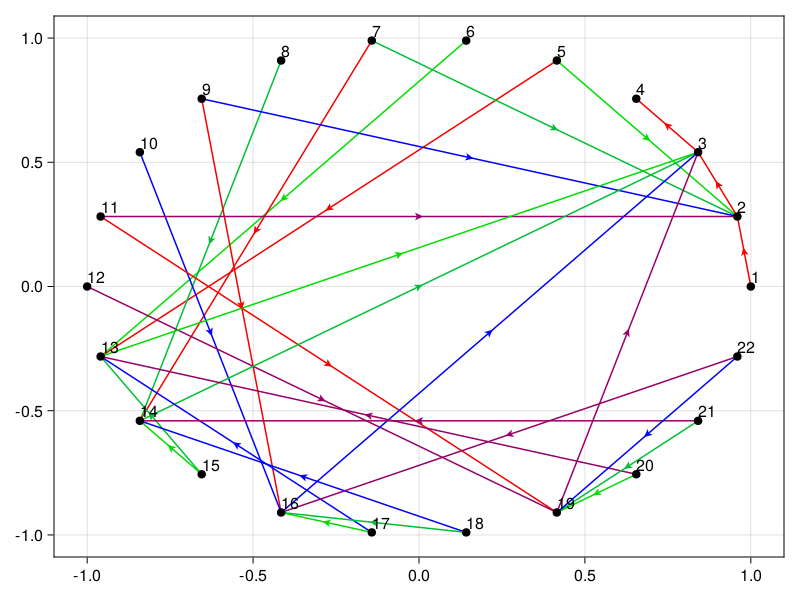

In [65]:
#Now I'll build the GB-skeleton for these instances and plot it.
using Graphs
using MetaGraphs
using GraphMakie
using CairoMakie
using NetworkLayout

function gb_skeleton(solutions, gb)
    skeleton = MetaDiGraph(length(solutions))
    #Add vertex labels corresponding to the solutions
    for i in 1:length(solutions)
        set_prop!(skeleton, i, :label, solutions[i])
    end
    #Add edges corresponding to the elements in the GB
    edge_indices = Int[]
    for i in 1:length(solutions)
        for j in 1:length(solutions)
            if i == j
                continue
            end
            k = findfirst(isequal(solutions[i] - solutions[j]), gb)
            if !isnothing(k)
                add_edge!(skeleton, i, j)
                push!(edge_indices, k)
            end
        end
    end
    return skeleton, edge_indices
end

function lift_binary_solution(solution)
    original_vars = solution[1:5]
    return [solution; -original_vars]
end

using Makie
function diverse_color(i, n)
    r = sin(2pi*i/n + 0.0)
    g = sin(2pi*i/n + 2pi/3)
    b = sin(2pi*i/n + 4pi/3)
    return Makie.RGBA(r, g, b)
end

function optimal_solution(skeleton)
    return findall(v -> length(outneighbors(skeleton, v)) == 0, vertices(skeleton))[1]
end

int_skeleton, edge_indices = gb_skeleton(integer_solutions, integer_gb)
opt_index = optimal_solution(int_skeleton)
println(opt_index, ": ", integer_solutions[opt_index])
edge_colors = [diverse_color(i, length(integer_gb)) for i in edge_indices]
graphplot(int_skeleton, nlabels=[string(i) for i in 1:length(integer_solutions)], edge_color=edge_colors, layout=Shell())

7: [1, 1, 0, 0, 0, 12]


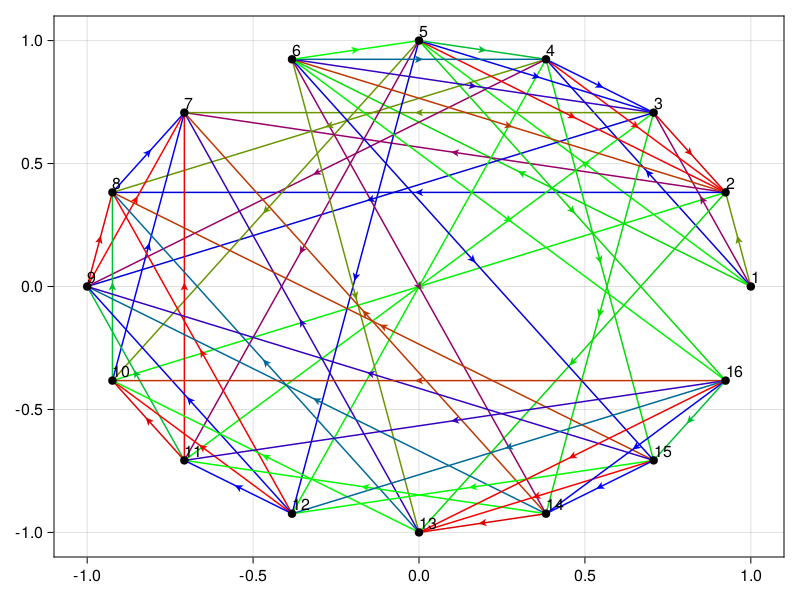

In [67]:
bin_skeleton, edge_indices = gb_skeleton(lift_binary_solution.(binary_solutions), binary_gb)
opt_index = optimal_solution(bin_skeleton)
println(opt_index, ": ", binary_solutions[opt_index])
edge_colors = [diverse_color(i, length(binary_gb)) for i in edge_indices]
graphplot(bin_skeleton, nlabels=[string(i) for i in 1:length(binary_solutions)], edge_color=edge_colors, layout=Shell())